In [7]:
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('jaw_clench_flavio.csv')
x = data['ch1']
# period = 1/frequency
period = 1/250
T = data['timestamp'] - data['timestamp'][0]

In [9]:
# 50hz notch filter with iirdesign cheby2
# Sampling frequency
fs = 250
sos_notch1 = scipy.signal.iirdesign(wp=[46, 54], ws=[48, 52], gpass=1, gstop=60, analog=False, ftype='cheby2', output='sos', fs=fs)
x_filt = scipy.signal.sosfilt(sos_notch1, x, zi=None)

In [10]:
# 100hz notch filter with iirdesign cheby2
# Sampling frequency
fs = 250
sos_notch2 = scipy.signal.iirdesign(wp=[96, 104], ws=[98, 102], gpass=1, gstop=60, analog=False, ftype='cheby2', output='sos', fs=fs)
x_filt = scipy.signal.sosfilt(sos_notch2, x_filt, zi=None)

In [11]:
# 1 Hz high pass filter with butter
# Sampling frequency
fs = 250
sos_hp = scipy.signal.iirdesign(wp=1, ws=0.5, gpass=1, gstop=40, analog=False, ftype='butter', output='sos', fs=fs)
x_filt = scipy.signal.sosfilt(sos_hp, x_filt, zi=None)

In [12]:
# bandpass filter with cheby2 [60hz, 90hz]
# Sampling frequency
fs = 250
sos_bp = scipy.signal.iirdesign(wp=[60, 90], ws=[58, 92], gpass=1, gstop=40, analog=False, ftype='cheby2', output='sos', fs=fs)
x_filt = scipy.signal.sosfilt(sos_bp, x_filt, zi=None)

In [13]:
# plot T and x_filt with plotly
import plotly.express as px

fig = px.line(x=T, y=x_filt)
fig.show()

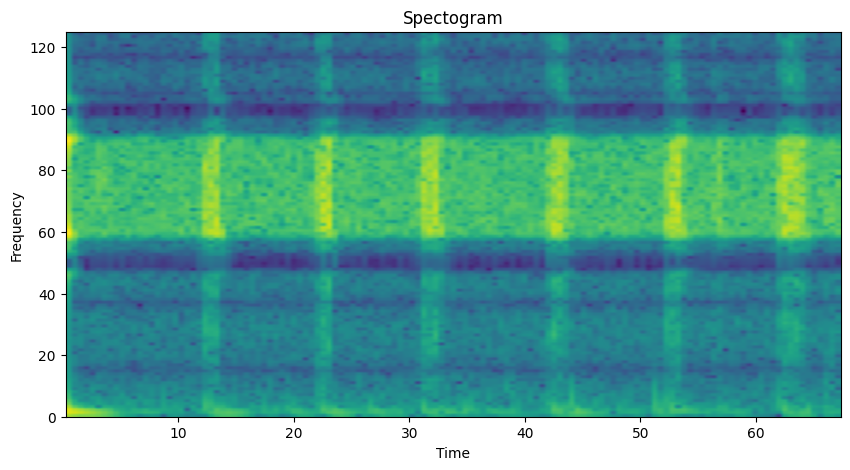

In [14]:
fig = plt.figure(figsize=(10, 5))
plt.specgram(x_filt, NFFT=256, Fs=250, noverlap=128)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram')
plt.show()

In [15]:
# Square filtered data
x_filt = x_filt ** 2

# plot T and x_filt with plotly
import plotly.express as px

fig = px.line(x=T, y=x_filt)
# set y axis to range 0 - 50000
fig.update_yaxes(range=[0, 5000])
fig.show()